In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import ttest_rel, ttest_ind
import numpy as np
import seaborn as sns
import os

rc('text', usetex=False);
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 19}

rc('font', **font);

%matplotlib qt

degrees = u'\u00B0'
um = u'\u00B5m'

In [43]:
def p_to_stars(p):
    """map p-values to stars to display on graphs"""
    if p > 0.05:
        return 'n.s.';
    elif p > 0.01:
        return '*';
    elif p > 0.005:
        return '**';
    else:
        return '***';

In [46]:
def my_boxplot(df, ylabel, column_names=['Control', 'Experimental'], scatter=True, ttest=False):
    fig, ax = plt.subplots(1,1,figsize=[4,8])
    sns.boxplot(data=df, whis=np.inf)
    if scatter:
        sns.swarmplot(data=df, color=".2")
    ax.set_ylabel(ylabel);
    ax.grid(False)
 
    # FOR NOW, ONLY T-TEST BETWEEN TWO CONDITIONS
    if ttest and len(column_names) > 1:
        p = ttest_ind(df[column_names[0]].dropna(), df[column_names[1]].dropna()).pvalue;
        print(p)
        start_ylims = ax.get_ylim();
        start_plot_height = ax.get_ylim()[1] - ax.get_ylim()[0];
        height_per_comparison = 0.1 * (start_ylims[1] - start_ylims[0]);
        ax.set_ylim(start_ylims[0], start_ylims[1] +  height_per_comparison);
        lx = ax.get_xticks()[0];
        rx = ax.get_xticks()[1];
        mid = lx/2 + rx/2;
        lry = start_ylims[1] + 0.5 * height_per_comparison;
        h = height_per_comparison/4;
 
        barx = [lx, lx, rx, rx];
        bary = [(lry-h), lry, lry, (lry-h)];
        ax.plot(barx, bary, c='black');
        ax.text(mid, lry + h/2, p_to_stars(p)); 
        
    ax.set_ylabel(ylabel);
 
    return fig, ax;


In [47]:
in_path = "/Users/cib/Desktop/deviation from 360.csv"
df = pd.read_csv(in_path)
fig, ax = my_boxplot(df, "Deviation from 360" + u'\u00B0', 
                     column_names=['Control', 'Experimental'], 
                     scatter=True, 
                     ttest=True)
ax.set_ylim([0, 68]);
out_path = os.path.join(os.path.dirname(in_path), os.path.splitext(os.path.basename(in_path))[0]);
fig.savefig(out_path+'.png', dpi=600)


0.024335613903093276


0.03180707653051328


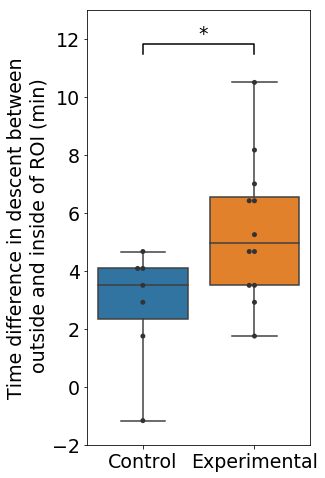

In [38]:
in_path = "/Users/cib/Desktop/time difference in descent.csv"
df4 = pd.read_csv(in_path)
fig, ax = my_boxplot(df4, "Time difference in descent between\n outside and inside of ROI (min)", column_names=['Control', 'Experimental'], scatter=True, ttest=True)
ax.set_ylim([-2, 13]);
out_path = os.path.join(os.path.dirname(in_path), os.path.splitext(os.path.basename(in_path))[0]);
fig.savefig(out_path+'.png', dpi=600)

0.0004325796585266516


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1842: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1843: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


AttributeError: 'tuple' object has no attribute 'set_yticks'

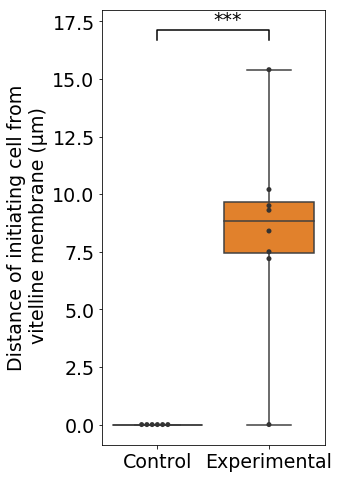

In [39]:
df2 = pd.read_csv("/Users/cib/Desktop/DATA/distance initiating cell.csv")
ax = my_boxplot(df2, "Distance of initiating cell from\n vitelline membrane (" u'\u00B5m)', column_names=['Control', 'Experimental'], scatter=True, ttest=True)
ax.set_yticks([y for y in range(-3,18,3)]);
ax.set_ylim([-2, 18])


(-14, 0)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


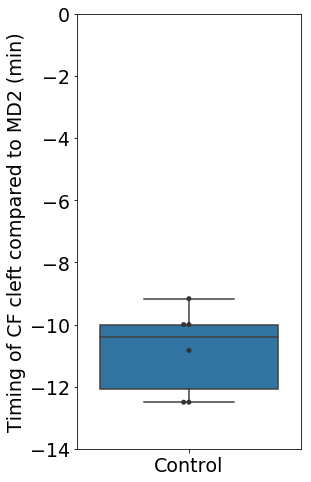

In [20]:
df3 = pd.read_csv("/Users/cib/Desktop/DATA/timing CF.csv")
fig, ax = my_boxplot(df3,"Timing of CF cleft compared to MD2 (min)", column_names=['Control'], scatter=True, ttest=False)
ax.set_ylim([-14, 0]) 

In [41]:
import os

